# Sect 25-Pt 2: Intro to Logistic Regression 

- online-ds-pt-041320
- 09/02/20

## Topics in Sect 25

- Last Class:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Accuracy, Precision, Recall, F1-Score
        - Confusion Matrices


- Today:
    - Applying Logistic Regression with scikit-learn
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

## Questions?

### From Last Class/Gdoc

- I’m confused about ROC and AUC. 
    - how are the false positive or false negative percents a parameter for ROC? 
    - How do you graph one vs the other when they are fixed values?<br>I don’t think I’m understanding what’s going on under the hood with this function…


- Pseudo R-squared from Statsmodels Logit summary


- Logistic Regression in Scikit Learn  Lab: 
    - Why didnt they do the get dummies?
    - 
logreg = `LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')` 
        - why is the fit_intercept False, and why do we assign large value to C?
        



### Answers

#### **Pseudo R-Squared: Stack Overflow Discussion:**
> "Those unfamiliar with 𝜌2 should be forewarned that its values tend to be considerably lower than those of the 𝑅2 index...For example, values of 0.2 to 0.4 for 𝜌2 represent EXCELLENT fit."
<br><br> So basically, 𝜌2 can be interpreted like 𝑅2, but don't expect it to be as big. And values from 0.2-0.4 indicate (in McFadden's words) excellent model fit."
- Source: https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation
    
    

#### Scikit Learn Logistic Regression parameters:
- From the docstring for LogsisticRegression,C:
```C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify strong```
    
- Scikit-Learn Logistic Regression User Guide:
    - https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

# Previously on...

## Implementing Logistic Regression

#### Predict Passenger Survival on Titanic

In [1]:
# !pip install fsds
from fsds.imports import *

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3,22.0,1,7.2500,male,S,0
1,1,38.0,1,71.2833,female,C,1
2,3,26.0,0,7.9250,female,S,1
3,1,35.0,1,53.1000,female,S,1
4,3,35.0,0,8.0500,male,S,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [4]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')

In [5]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

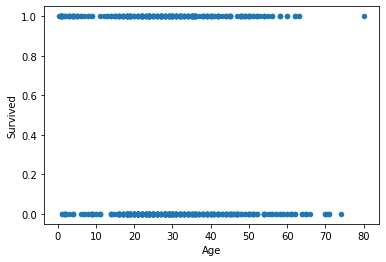

In [6]:
df.plot('Age','Survived',kind='scatter');

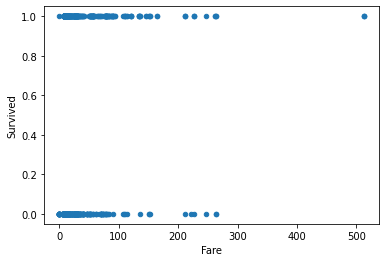

In [7]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

<!-- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split
-->

- Train-test-split
- Address null values
- Encode categorical data
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [8]:
## Null Values
df.isna().sum() / len(df)

Pclass      0.054994
Age         0.198653
SibSp       0.000000
Fare        0.000000
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [9]:
## Separate X and y
target = 'Survived'
X = df.drop(columns=target)
y = df[target]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
## String columns
cat_cols = df.drop(columns=target).select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [11]:
## Number cols
num_cols = df.drop(columns=target).select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=221)

print(X_train.shape, y_test.shape)
pd.Series(y_train).value_counts(1)

(668, 6) (223,)


0    0.642216
1    0.357784
Name: Survived, dtype: float64

In [13]:
X_train.isna().sum()

Pclass       29
Age         136
SibSp         0
Fare          0
Sex           0
Embarked      0
dtype: int64

In [14]:
## Saving null value indices
train_nulls = X_train.isna().any(axis=1)
test_nulls = X_test.isna().any(axis=1)

In [15]:
## Dropping Nulls for time
X_train = X_train.loc[~train_nulls]
y_train = y_train.loc[~train_nulls]

X_test = X_test.loc[~test_nulls]
y_test = y_test.loc[~test_nulls]
# X_train.isna().sum()

In [16]:
X_train.isna().sum(), X_test.isna().sum()

(Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64,
 Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64)

In [17]:
## REMOVED FROM WORKFLOW
# from sklearn.impute import SimpleImputer
# imputer_num = SimpleImputer(strategy='median')

# X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
# X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')


## Copy the numerical columns to new ohe X_train, X_test
X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()

## Fit the encoder
encoder.fit(X_train[cat_cols])
ohe_cols = encoder.get_feature_names(cat_cols)

## Transform X_train and X_test
X_train_ohe[ohe_cols] = encoder.transform(X_train[cat_cols])
X_test_ohe[ohe_cols] = encoder.transform(X_test[cat_cols])

X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
705,2.0,39.0,0,26.0000,1.0,0.0,1.0
559,3.0,36.0,1,17.4000,0.0,0.0,1.0
521,3.0,22.0,0,7.8958,1.0,0.0,1.0
314,2.0,43.0,1,26.2500,1.0,0.0,1.0
429,3.0,32.0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...
483,3.0,63.0,0,9.5875,0.0,0.0,1.0
885,3.0,39.0,0,29.1250,0.0,1.0,0.0
882,3.0,22.0,0,10.5167,0.0,0.0,1.0
742,1.0,21.0,2,262.3750,0.0,0.0,0.0


In [19]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

X_train_sca

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
705,-0.280074,0.656961,-0.536520,-0.151087,1.0,0.0,1.0
559,0.922596,0.448871,0.551423,-0.332941,0.0,0.0,1.0
521,0.922596,-0.522217,-0.536520,-0.533915,1.0,0.0,1.0
314,-0.280074,0.934414,0.551423,-0.145800,1.0,0.0,1.0
429,0.922596,0.171417,-0.536520,-0.530654,1.0,0.0,1.0
...,...,...,...,...,...,...,...
483,0.922596,2.321682,-0.536520,-0.498143,0.0,0.0,1.0
885,0.922596,0.656961,-0.536520,-0.085006,0.0,1.0,0.0
882,0.922596,-0.522217,-0.536520,-0.478494,0.0,0.0,1.0
742,-1.482743,-0.591580,1.639367,4.847260,0.0,0.0,0.0


In [20]:
## Verify scaling
X_train_ohe.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,511.00,511.00,511.00,511.00,511.00,511.00,511.00
mean,2.23,29.53,0.49,33.14,0.65,0.04,0.78
std,0.83,14.43,0.92,47.34,0.48,0.19,0.42
min,1.00,0.42,0.00,0.00,0.00,0.00,0.00
25%,1.00,20.00,0.00,8.05,0.00,0.00,1.00
50%,2.00,28.00,0.00,15.50,1.00,0.00,1.00
75%,3.00,38.00,1.00,33.00,1.00,0.00,1.00
max,3.00,74.00,5.00,512.33,1.00,1.00,1.00


In [21]:
X_train_sca.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,511.00,511.00,511.00,511.00,511.00,511.00,511.00
mean,-0.00,-0.00,0.00,-0.00,0.65,0.04,0.78
std,1.00,1.00,1.00,1.00,0.48,0.19,0.42
min,-1.48,-2.02,-0.54,-0.70,0.00,0.00,0.00
25%,-1.48,-0.66,-0.54,-0.53,0.00,0.00,1.00
50%,-0.28,-0.11,-0.54,-0.37,1.00,0.00,1.00
75%,0.92,0.59,0.55,-0.00,1.00,0.00,1.00
max,0.92,3.08,4.90,10.13,1.00,1.00,1.00


## Fitting a Logistic Regression with `statsmodels`

In [22]:
import statsmodels.api as sm

In [23]:
y_train.value_counts()

0    321
1    190
Name: Survived, dtype: int64

In [24]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
705,1.0,-0.280074,0.656961,-0.536520,-0.151087,1.0,0.0,1.0
559,1.0,0.922596,0.448871,0.551423,-0.332941,0.0,0.0,1.0
521,1.0,0.922596,-0.522217,-0.536520,-0.533915,1.0,0.0,1.0
314,1.0,-0.280074,0.934414,0.551423,-0.145800,1.0,0.0,1.0
429,1.0,0.922596,0.171417,-0.536520,-0.530654,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
483,1.0,0.922596,2.321682,-0.536520,-0.498143,0.0,0.0,1.0
885,1.0,0.922596,0.656961,-0.536520,-0.085006,0.0,1.0,0.0
882,1.0,0.922596,-0.522217,-0.536520,-0.478494,0.0,0.0,1.0
742,1.0,-1.482743,-0.591580,1.639367,4.847260,0.0,0.0,0.0


In [25]:
logit = sm.Logit(y_train,X_train_sms).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.422151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  511
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.3603
Time:                        19:07:27   Log-Likelihood:                -215.72
converged:                       True   LL-Null:                       -337.22
Covariance Type:            nonrobust   LLR p-value:                 8.564e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4746      0.329      4.475      0.000       0.829       2.120
Pclass        -1.0147      0.165     -6.148      0.000      -1.338      -0.691
Age           -0.6972      0.144     -4.854      0.000      -0.979      -0.416
SibSp         -0.2736      0.140     -1.948      0.051      -0.549       0.002
Fare          -0.0272      0.140     -0.195      0.846      -0.301       0.247
Sex_male      -2.7507      0.265    -10.399      0.000      -3.269      -2.232
Embarked_Q    -1.6988      0.793     -2.143      0.032      -3.253      -0.145
Embarked_S    -0.4827      0.322     -1.497      0.134      -1.115       0.149
==============================================================================
"""

In [26]:
from sklearn import metrics
y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
display(y_hat_train.head(),y_train.head())

705    0.0
559    0.0
521    0.0
314    0.0
429    0.0
dtype: float64

705    0
559    1
521    0
314    0
429    1
Name: Survived, dtype: int64

In [28]:
def remake_df(array,df):
    """Returns the array as a df with the same columns and index as df"""
    return pd.DataFrame(array, columns=df.columns, index=df.index)


def plot_confusion_matrix(y_test,y_hat_test, normalize='true',
                          classes=['Died','Survived'],cmap='Blues',
                         style='seaborn-notebook'):
    """Plots Confusion Matrix from sklearn."""
    
    cm = metrics.confusion_matrix(y_test,y_hat_test.round(),
                                  normalize=normalize)
    
    with plt.style.context(style):
        ax = sns.heatmap(cm,annot=True,square=True, center=0,cmap=cmap,
                   xticklabels=classes,yticklabels=classes)
        
    if normalize==False:
        title = "Raw Confusion Matrix"
    else:
        title = f"Normalized Confusion Matrix\n(by {normalize} classes)"
        
    ax.set(ylabel='True Classes',xlabel='Predicted Classes',title=title)
    fig = ax.get_figure()
    
    return fig,ax


def evaluate_statsmodel(y_test,y_hat_test,classes=['Died','Survived'],
                   normalize='true',cmap='Blues'):
    """Evaluates Classification models by displaying:
    - Classification Report
    - Normalized Confusion Matrix"""
    dashes = '---'*20
    print(dashes)
    print("[i] CLASSIFICATION REPORT")
    print(dashes)
    
    print(metrics.classification_report(y_test,y_hat_test.round(),
                                        target_names=classes))
    print(dashes)
    fig,ax = plot_confusion_matrix(y_test,y_hat_test)

    
    
def get_model_coeffs(X_df,model, statsmodels=True):
        
    if statsmodels == False:
        coeffs_df = pd.DataFrame({'Coefficients':model.coef_[0]},index=X_df.columns)
        coeffs_df.loc['const'] = model.intercept_
        coeffs_df
    else:
        coeffs_df = pd.DataFrame({
            'Coefficents':model.params,
            'p-values':model.pvalues.round(4)
        })
        
    return coeffs_df

Optimization terminated successfully.
         Current function value: 0.422151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  511
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.3603
Time:                        19:10:27   Log-Likelihood:                -215.72
converged:                       True   LL-Null:                       -337.22
Covariance Type:            nonrobust   LLR p-value:                 8.564e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4746      0.329      4.475      0.000       0.829       2.120
Pclass        -1.0147      0.165     -6.148      0.000      -1.338      -0.691
Age           -0.6972      0.144     -4.854      0.000      -0.979      -0.416
SibSp         -0.2736      0.140     -1.948      0.051      -0.549       0.002
Fare          -0.0272      0.140     -0.195      0.846      -0.301       0.247
Sex_male      -2.7507      0.265    -10.399      0.000      -3.269      -2.232
Embarked_Q    -1.6988      0.793     -2.143      0.032      -3.253      -0.145
Embarked_S    -0.4827      0.322     -1.497      0.134      -1.115       0.149
==============================================================================
"""

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.71      0.84      0.77        88
    Survived       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


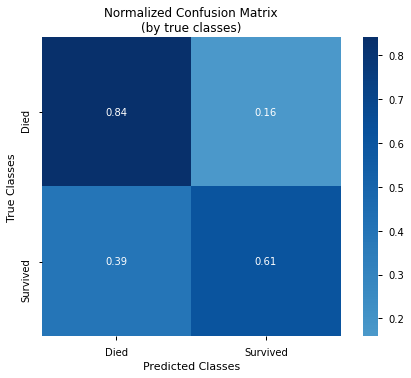

In [29]:
## Putting it all Together
logit = sm.Logit(y_train,X_train_sms).fit()
display(logit.summary())

y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
evaluate_statsmodel(y_test,y_hat_test)

Optimization terminated successfully.
         Current function value: 0.422151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  511
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:                  0.3603
Time:                        19:10:28   Log-Likelihood:                -215.72
converged:                       True   LL-Null:                       -337.22
Covariance Type:            nonrobust   LLR p-value:                 8.564e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4746      0.329      4.475      0.000       0.829       2.120
Pclass        -1.0147      0.165     -6.148      0.000      -1.338      -0.691
Age           -0.6972      0.144     -4.854      0.000      -0.979      -0.416
SibSp         -0.2736      0.140     -1.948      0.051      -0.549       0.002
Fare          -0.0272      0.140     -0.195      0.846      -0.301       0.247
Sex_male      -2.7507      0.265    -10.399      0.000      -3.269      -2.232
Embarked_Q    -1.6988      0.793     -2.143      0.032      -3.253      -0.145
Embarked_S    -0.4827      0.322     -1.497      0.134      -1.115       0.149
==============================================================================
"""

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.71      0.84      0.77        88
    Survived       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


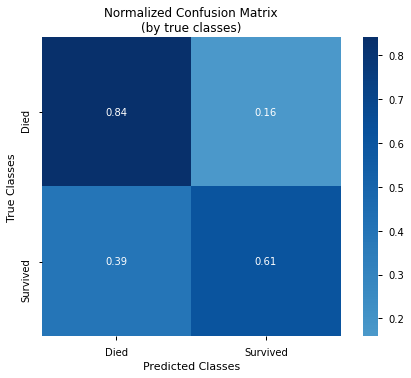

In [30]:
## Putting it all Together
logit = sm.Logit(y_train,X_train_sms).fit()
display(logit.summary())

y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
evaluate_statsmodel(y_test,y_hat_test)

In [ ]:
# get_model_coeffs(X_train_sms,logit)

# Part 2 -  Logistic Regression with `sklearn`


## Fitting a Logistic Regression with `sklearn`

> REMINDER: Our current variables:
- X_train_sca
- X_test_sca
- y_train
- y_test


> Our current functions are:
- `plot_confusion_matrix`
- `remake_df`
- `evaluate_statsmodels`

In [32]:
from sklearn.linear_model import LogisticRegression

## Fit a logistic regression model with defaults
log_reg = LogisticRegression()
log_reg.fit(X_train_sca, y_train)


LogisticRegression()

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.73      0.85      0.79        88
    Survived       0.79      0.64      0.71        77

    accuracy                           0.75       165
   macro avg       0.76      0.74      0.75       165
weighted avg       0.76      0.75      0.75       165

------------------------------------------------------------


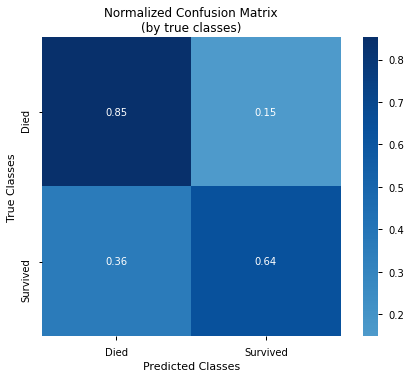

In [36]:
## Get Predictions for training and test data
y_hat_train = log_reg.predict(X_train_sca)
y_hat_test = log_reg.predict(X_test_sca)

## Use our evaluation function
evaluate_statsmodel(y_test,y_hat_test)#,normalize=False)


In [40]:
log_reg.coef_[0]

array([-9.74663506e-01, -6.63668889e-01, -2.49112063e-01, -1.60381600e-03,
       -2.54220561e+00, -1.02896318e+00, -3.64697087e-01])

In [44]:
## Get the coefficents from the model and make into a series
coeffs = pd.Series(log_reg.coef_[0], index=X_train_sca.columns)
coeffs.loc['intercept'] = log_reg.intercept_[0]
coeffs

Pclass       -0.974664
Age          -0.663669
SibSp        -0.249112
Fare         -0.001604
Sex_male     -2.542206
Embarked_Q   -1.028963
Embarked_S   -0.364697
intercept     1.244501
dtype: float64


> #### A note on hyperparameters:
- There are several parameters we control for our model. 
    - e.g.:
    - `C`
    - `solver`
    - `fit_intercept`

> - We ideally should not blindly trust the model's defaults, but should learn more about them. 
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### We will explore this more shortly...

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.71      0.84      0.77        88
    Survived       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


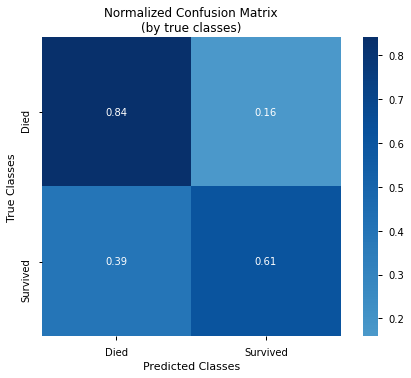

In [45]:
## Fit a logistic regression model with C=1e5, solver='liblinear'
log_reg = LogisticRegression(C=1e5, solver='liblinear')
log_reg.fit(X_train_sca, y_train)


y_hat_train = log_reg.predict(X_train_sca)
y_hat_test = log_reg.predict(X_test_sca)


evaluate_statsmodel(y_test,y_hat_test)

# ROC Curve - Receiver Operating Characteristic Curve

## Evaluating Our Model

### Graph Interpretation

False Positive Rate vs True Positive Rate → for each threshold

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_comparison.png" width=70%>

Imagine we have a logistic regression (classifier):
 - Turn a continuous feature to binary prediction

### What Distributions Would Work Well in Classifying?

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_crossover.png" width=60%>

### Defining the Threshold

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/auc_rates.png" width=60%>

In [69]:
# Interactive ROC curve
from IPython.display import IFrame
IFrame('http://www.navan.name/roc/', width=900, height=600)

In [50]:
import sklearn.metrics 
# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites


## Get y_score or y_score_prob from the log_reg decision function / predict proba
y_score = log_reg.decision_function(X_test_sca)
y_score_prob = log_reg.predict_proba(X_test_sca)

fpr,tpr,thresh = metrics.roc_curve(y_test,y_score)
metrics.auc(fpr, tpr)

0.8261511216056671

In [52]:
y_score.shape, y_score_prob.shape

((165,), (165, 2))

In [56]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_score_prob[:,1])
metrics.auc(fpr, tpr)

0.8261511216056671

In [62]:
# X_train_sca.shape

In [66]:
thresh

array([1.967195  , 0.967195  , 0.92577941, 0.92388668, 0.82609209,
       0.8244578 , 0.75971931, 0.75493538, 0.66842965, 0.66315912,
       0.65240505, 0.64369956, 0.64134582, 0.6186581 , 0.60753681,
       0.59366062, 0.54964785, 0.54830008, 0.54542629, 0.49740083,
       0.4912729 , 0.47184614, 0.44673709, 0.43557572, 0.41465219,
       0.41464153, 0.34639444, 0.30147268, 0.29995125, 0.22398547,
       0.21261506, 0.20005649, 0.19806461, 0.19651795, 0.18200522,
       0.16170607, 0.15623794, 0.14901996, 0.14796949, 0.1376809 ,
       0.13098322, 0.12704843, 0.12172401, 0.09060904, 0.09029108,
       0.08994854, 0.08545256, 0.07529885, 0.06882936, 0.06580827,
       0.06579377, 0.06509801, 0.06409433, 0.02732937, 0.02356542,
       0.01704613])

In [72]:
# y_score

(0.0, 1.0)

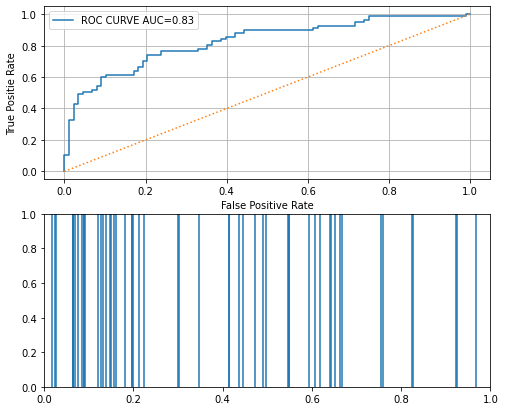

In [81]:
## Plot The ROC Curve
fig, axes = plt.subplots(nrows=2,figsize=(8,7))

ax =axes[0]
## PLot fpt vs tpr
ax.plot(fpr,tpr, label=f'ROC CURVE AUC={round(metrics.auc(fpr, tpr),2)}')
## Plot a diagnonal line to indicate worthless model
ax.plot([0,1],[0,1],ls=':',)

## Properly Label axes and title figure

ax.set(xlabel='False Positive Rate',ylabel='True Positie Rate')
## Add legend and grid

ax.legend()
ax.grid()

ax =axes[1]
[ax.axvline(t) for t in thresh];
ax.set_xlim(0,1)

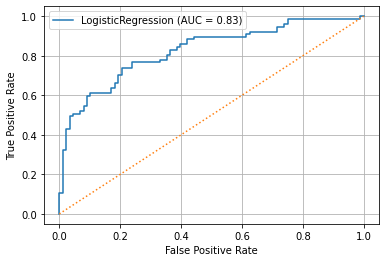

In [88]:
curve = metrics.plot_roc_curve(log_reg,X_test_sca,y_test)
ax = curve.ax_
ax.legend()
ax.plot([0,1],[0,1],ls=':')
ax.grid()

### But now there's a sklearn tool for that!

In [ ]:
metrics.plot_roc_curve(log_reg,X_test_sca,y_test)

In [ ]:
## Update the sklearn plot to include the diagonal line and grid


# Activity: Make an `evaluate_classification` function

- Write a function called `evaluate_classification`
- It should accept (at minimum): 
    - model (sklearn model)
    - X_test
    - y_test
    
- ***Ideally you should also accept X_train and y_train to compare results to check for overfitting. ?***
- It should produce:
    - Classification metrics printed
    - Confusion Matrix displayed
    - roc_auc curve displayed
    
    
- Then revisit some of the questions we had from last class re: scaling, LogisticRegression parameters

In [107]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap="Blues",figsize=(10,5)): 
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    ## Classification Report / Scores 
    dashes = '---'*20
    print(dashes)
    print("[i] CLASSIFICATION REPORT")
    print(dashes)
    
    print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
    print(dashes)
    
    
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,normalize=normalize,
                                 cmap=cmap,ax=axes[0])

    
    ## MAKE FIGURE

    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])
    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1],ls=':')
    ax.grid()
    ## Plot Confusion Matrix 

    
    ## Plot ROC Curve
    pass
    

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.71      0.84      0.77        88
    Survived       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


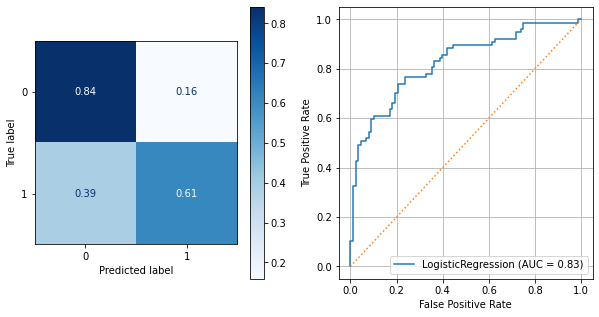

In [108]:
## Fit and evaluate a logistic regression 
params  = dict(C=1e5, solver='liblinear')
log_reg = LogisticRegression(**params)
log_reg.fit(X_train_sca, y_train)

evaluate_classification(log_reg,X_test_sca,y_test,
                        classes=['Died','Survived'])#,label=str(params));

# Hyperparameter Tuning: GridSearchCV 

### `solver` Parameter
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

- The solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”:

- The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the excellent C++ LIBLINEAR library, which is shipped with scikit-learn. However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes. This happens under the hood, so LogisticRegression instances using this solver behave as multiclass classifiers.





In [109]:
1000,10**3, 1e3

(1000, 1000, 1000.0)

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = LogisticRegression()
params= {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
gridsearch = GridSearchCV(model, params,scoring='roc_auc')
gridsearch

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [125]:
gridsearch.fit(X_train_sca, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [126]:
best_params = gridsearch.best_params_
best_params

{'C': 10}

In [127]:
gridsearch.best_estimator_

LogisticRegression(C=10)

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        88
           1       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


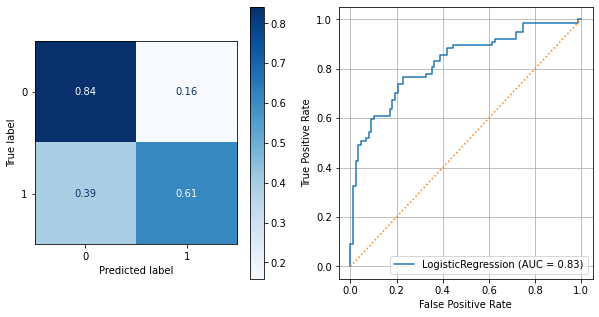

In [130]:
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_sca, y_train)
evaluate_classification(best_model,X_test_sca,y_test)

In [131]:
res_df = pd.DataFrame(gridsearch.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005477,0.000172,0.003235,0.000493,0.001,{'C': 0.001},0.657895,0.841694,0.835526,0.775493,0.817434,0.785609,0.067917,6
1,0.006287,0.000662,0.003051,0.000213,0.01,{'C': 0.01},0.710931,0.892270,0.840049,0.821957,0.839638,0.820969,0.059843,5
2,0.007554,0.000645,0.003114,0.000362,0.1,{'C': 0.1},0.774089,0.921875,0.833882,0.862664,0.876234,0.853749,0.048922,4
3,0.008469,0.000281,0.003263,0.000430,1,{'C': 1},0.791903,0.916530,0.824424,0.870477,0.898438,0.860354,0.046228,2
4,0.008401,0.001106,0.002852,0.000205,10,{'C': 10},0.797976,0.912829,0.817434,0.872533,0.901316,0.860418,0.045416,1
5,0.008075,0.000246,0.002789,0.000284,100,{'C': 100},0.797976,0.911595,0.815789,0.872533,0.901316,0.859842,0.045448,3


<AxesSubplot:xlabel='param_C'>

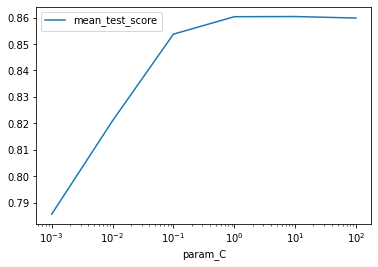

In [132]:
res_df.plot('param_C','mean_test_score',logx=True)

In [133]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = LogisticRegression()

params = {'C' : [0.01,0.1,1.0,10,100,1e5],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'fit_intercept':[True,False],
          'class_weight':[None,'balanced']
         }

gridsearch = GridSearchCV(model,params,scoring='roc_auc',return_train_score=True)
gridsearch.fit(X_train_sca,y_train)

print('BEST RESULTS:')
print(gridsearch.best_score_)
gridsearch.best_params_

BEST RESULTS:
0.8604175101214576


{'C': 10,
 'class_weight': None,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [134]:
best_params = gridsearch.best_params_
best_params

{'C': 10,
 'class_weight': None,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'newton-cg'}

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        88
           1       0.77      0.61      0.68        77

    accuracy                           0.73       165
   macro avg       0.74      0.73      0.73       165
weighted avg       0.74      0.73      0.73       165

------------------------------------------------------------


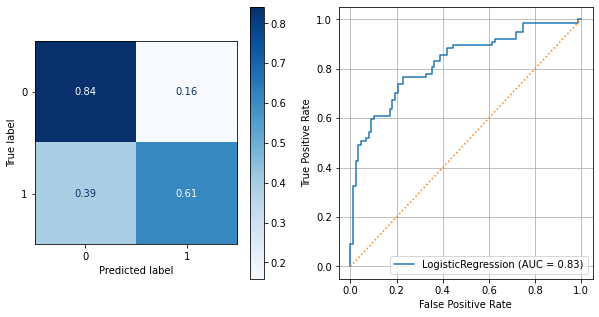

In [135]:
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_sca,y_train)
evaluate_classification(best_model,X_test_sca,y_test)

In [ ]:
grid_results = pd.DataFrame(gridsearch.cv_results_)
grid_results.sort_values('mean_train_score')

# Class Imbalance

## Class Imbalance Problems Lab

In [ ]:
# !pip install -U imblearn

In [136]:
df = pd.read_csv('creditcard.csv.gz')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [138]:
target = 'Class'
y = df[target].copy()
X = df.drop(columns=target).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train.value_counts(1)

0    0.998258
1    0.001742
Name: Class, dtype: float64

### When metrics can be misleading...
- i.e. accuracy


In [139]:
# from sklearn
regr = LogisticRegression(fit_intercept=False, solver='liblinear')
regr.fit(X_train, y_train)

regr.score(X_test,y_test)

0.9984691441251651

> ### Woohoo! We must have an amazing model!!...

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.54      0.56      0.55       120

    accuracy                           1.00     71202
   macro avg       0.77      0.78      0.78     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------------------------------------


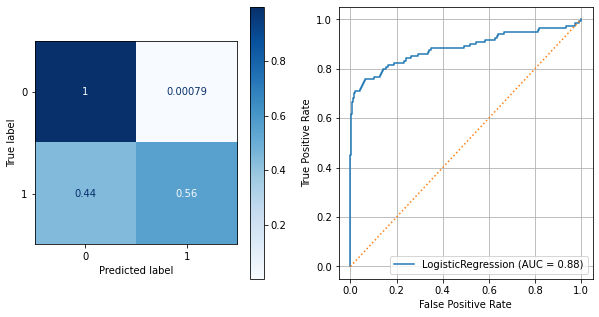

In [141]:
evaluate_classification(regr,X_test, y_test)#,label='Imbalanced');

In [142]:
y_test.value_counts(normalize=True)

0    0.998315
1    0.001685
Name: Class, dtype: float64

### DummyClassifier for Dummies

In [143]:
from sklearn.dummy import DummyClassifier

## Let's guess 0 for every observation
dummy = DummyClassifier(strategy='constant',constant=0)

preds = dummy.fit(X_train,y_train).predict(X_test)

## How did we do?
dummy.score(X_test,y_test)

0.9983146540827504

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.00      0.00      0.00       120

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------------------------------------


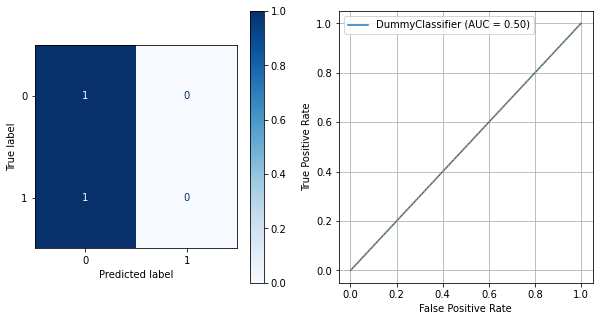

In [145]:
evaluate_classification(dummy,X_test, y_test)#,label='Dummy');

> So what can we do?

## The Possible Solutions

- Using `class_weight` parameter 
- Oversampling the minority class
- Undersampling the majority class

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.54      0.56      0.55       120

    accuracy                           1.00     71202
   macro avg       0.77      0.78      0.78     71202
weighted avg       1.00      1.00      1.00     71202

------------------------------------------------------------
{'fit_intercept': False, 'solver': 'liblinear'}


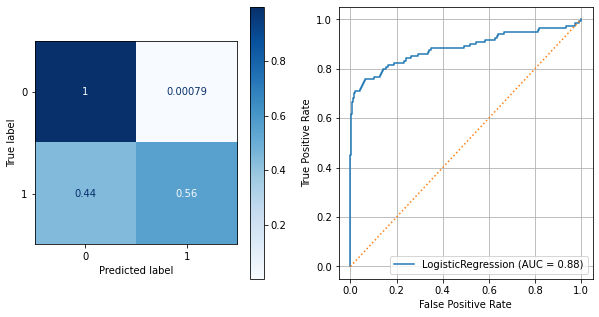

In [147]:
## Baseline Model using lesson paras
params = dict(fit_intercept=False, solver='liblinear')
regr = LogisticRegression(**params)
regr.fit(X_train, y_train)
evaluate_classification(regr,X_test,y_test)#,label="BASELINE" )
print(params)#str(params))

### Solution 1: `class_weight="balanced"`


------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71082
           1       0.05      0.91      0.09       120

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202

------------------------------------------------------------


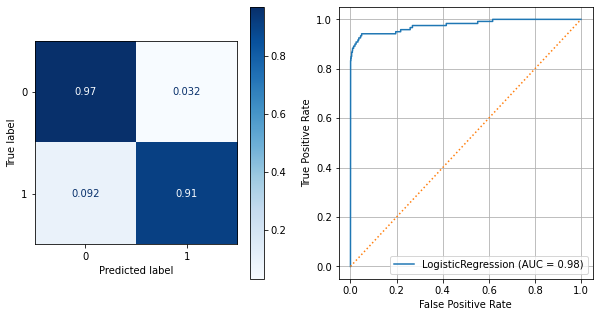

In [149]:
regr = LogisticRegression(class_weight='balanced',**params)
regr.fit(X_train, y_train)
evaluate_classification(regr,X_test,y_test)#,label='balanced')

### Solution 2: Oversampling minority class with SMOTE

In [150]:
y_train.value_counts(0)

0    213233
1       372
Name: Class, dtype: int64

In [151]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
pd.Series(y_train_smote).value_counts()

1    213233
0    213233
Name: Class, dtype: int64

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.07      0.88      0.14       120

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202

------------------------------------------------------------


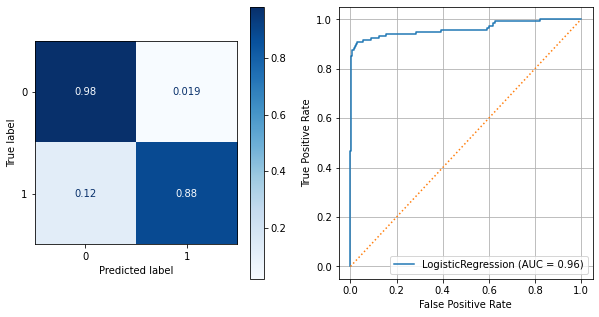

In [154]:
regr = LogisticRegression(**params)#class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_smote, y_train_smote)
evaluate_classification(regr,X_test,y_test)#,label='SMOTE')

### Solution 3: Undersampling majority class

In [155]:
df_balance = pd.concat([X_train, y_train],axis=1)
df_balance

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194763,130747.0,2.047163,0.107987,-1.806515,0.072733,0.248371,-1.744837,0.712448,-0.488842,-0.102709,...,0.241017,0.822618,0.023000,0.549868,0.322173,0.191755,-0.085025,-0.084292,0.77,0
135660,81344.0,1.282404,0.459864,-0.372286,0.826375,0.463568,-0.466407,0.460867,-0.186469,-0.549700,...,0.013986,0.083896,-0.247504,-0.325527,0.927293,-0.272555,-0.010168,-0.005332,1.79,0
259186,159004.0,-0.414863,0.012026,1.356386,1.107374,0.813456,-0.156497,-0.372675,0.031095,-0.100143,...,-0.052272,-0.088160,0.062521,-0.680805,-0.641474,-0.159995,0.237628,0.204343,5.95,0
87387,61662.0,-1.432948,1.478076,0.576724,0.207540,-0.670662,-0.464572,0.221023,-0.099811,1.561896,...,-0.055014,0.364330,0.154670,0.635611,-0.366314,0.163690,-0.750285,-0.275117,9.20,0
267282,162703.0,2.051016,-0.016765,-2.284865,0.302168,0.786895,-0.998558,0.768990,-0.464383,0.362863,...,0.133331,0.491780,-0.119020,0.527179,0.607105,-0.090453,-0.065787,-0.062680,47.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89,0
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99,0
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90,0
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31,0


In [ ]:
n_samples = df_balance['Class'].value_counts().min()
n_samples

In [ ]:
df_balance.groupby('Class').groups

In [ ]:
df_resample = pd.DataFrame()
for grp,idx in df_balance.groupby('Class').groups.items():
    
    resample = df_balance.loc[idx].sample(n=n_samples,random_state=123)
    df_resample = pd.concat([df_resample,resample],axis=0)
    
display(df_resample.head(), df_resample["Class"].value_counts())



In [ ]:
X_train_under = df_resample.drop('Class',axis=1).copy()
y_train_under = df_resample['Class'].copy()

regr = LogisticRegression(**params)#C=1e5, solver='liblinear')
regr.fit(X_train_under, y_train_under)
evaluate_classification(regr,X_test,y_test)

# Sect 26: Topics to Discuss

- Recommendation: do not get too stressed out about that this module. Its a lot of revisiting concepts that we've discussed before. 
    - Don't stress about the labs, look at the solutions and digest what they are doing.
    
- [Terms to remember](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-26-in-depth-logistic-regression/mle-review)
    - "log-likelihood"
    - "Maximum Likelihood Estimation"

# APPENDIX

In [ ]:
## Trying out class balances with different seeds
# seed_results = []
# for seed in range(321):
#     X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=seed)
#     percent_class_1 =  y_train.value_counts(1).loc[1]
#     seed_results.append({'seed':seed, 'value_counts':percent_class_1})

# pd.DataFrame.from_records(seed_results).sort_values('value_counts').head()

### Faster GridSearches with Tune Sklearn
https://towardsdatascience.com/5x-faster-scikit-learn-parameter-tuning-in-5-lines-of-code-be6bdd21833c

In [ ]:
# # !pip install scikit-optimize
# !pip install tune-sklearn
# !pip install tune-sklearn ray[tune]

In [ ]:
# from tune_sklearn import TuneGridSearchCV

# model = LogisticRegression()

# params = {'C' : [0.01,0.1,1.0,10,100,1e5],
#           'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#           'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
#           'fit_intercept':[True,False],
#           'class_weight':[None,'balanced']
#          }

# gridsearch = TuneGridSearchCV(model,params,scoring='roc_auc',return_train_score=True)
# gridsearch.fit(X_train_sca,y_train)

# print('BEST RESULTS:')
# print(gridsearch.best_score_)
# gridsearch.best_params_

## Old School ROC CURVE 

In [ ]:

def plot_roc_curve(y_test,y_score):
    # y_score = regr.decision_function(X_test)
    fpr,tpr,thresh = metrics.roc_curve(y_test,y_score)
    AUC = round(metrics.auc(fpr,tpr),3)
    print(f"ROC-area-under-the-curve= {AUC}")

    fig,ax=plt.subplots()
    ax.plot(fpr,tpr,color='darkorange',label=f'ROC Curve AUC: {AUC}')
    ax.plot([0,1],[0,1],ls=':')
    
    ax.set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')

    
    ax.legend()
    ax.grid()

    
# plot_roc_curve(y_test,y_score) 